In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## Datos de dos Municipios de Colombia con información de Conflicto armado y violencia durante 233 meses (año 2003 a 2022)

In [2]:
df = pd.read_excel('s3://proyectosandratamayo/BuenaventuraySanAndTumacmesxmes.xlsx')

In [3]:
#df = pd.read_excel('/content/drive/MyDrive/Proyecto investigación/BuenaventuraySanAndTumacmesxmes.xlsx')

In [3]:
df

,Código DANE de Municipio,Año,Mes,cruce,Victconf_Desplazamiento forzado,Cant_acc_subversivas,Cant_acc_terroristas,Cant_atenta_pte_vias,Cant_delito_med_ambiente,Cant_delito_sexual,...,Victconf_Delitointegridadsexual,Victconf_Desaparición forzada,Victconf_Homicidio,Victconf_LesionPersonalFisica,Victconf_LesionPersonalPsicolog,Victconf_MinasAntipers_explos,Victconf_PerdidadeBienes,Victconf_Secuestro,Victconf_Tortura,Victconf_Vinculacde Niños NiñasyAdoles
0,52835,2003,1,5283520031,115,0,0,0,0,0,...,2,3,27,0,0,0,1,0,0,0
1,52835,2003,2,5283520032,148,1,0,0,0,1,...,0,3,17,0,1,0,0,2,1,0
2,52835,2003,3,5283520033,120,0,0,0,0,0,...,1,4,26,0,0,0,2,1,0,0
3,52835,2003,4,5283520034,74,0,0,0,0,0,...,1,3,24,0,0,0,0,1,0,0
4,52835,2003,5,5283520035,91,1,0,0,0,0,...,2,2,27,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,76109,2022,1,7610920221,2558,0,0,0,0,3,...,2,0,1,0,0,0,3,0,0,0
462,76109,2022,2,7610920222,2003,0,0,0,2,6,...,4,0,0,0,0,0,1,0,0,0
463,76109,2022,3,7610920223,1299,0,0,0,0,11,...,5,0,0,0,0,0,1,0,0,0
464,76109,2022,4,7610920224,1502,0,0,0,2,14,...,5,0,1,0,0,0,0,0,0,0


## Exploracion de datos

In [4]:
#información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Código DANE de Municipio                466 non-null    int64
 1   Año                                     466 non-null    int64
 2   Mes                                     466 non-null    int64
 3   cruce                                   466 non-null    int64
 4   Victconf_Desplazamiento forzado         466 non-null    int64
 5   Cant_acc_subversivas                    466 non-null    int64
 6   Cant_acc_terroristas                    466 non-null    int64
 7   Cant_atenta_pte_vias                    466 non-null    int64
 8   Cant_delito_med_ambiente                466 non-null    int64
 9   Cant_delito_sexual                      466 non-null    int64
 10  Cant_extorsion                          466 non-null    int64
 11  Cant_homicidios    

In [5]:
#Descripción del dataframe
df.describe()

,Código DANE de Municipio,Año,Mes,cruce,Victconf_Desplazamiento forzado,Cant_acc_subversivas,Cant_acc_terroristas,Cant_atenta_pte_vias,Cant_delito_med_ambiente,Cant_delito_sexual,...,Victconf_Delitointegridadsexual,Victconf_Desaparición forzada,Victconf_Homicidio,Victconf_LesionPersonalFisica,Victconf_LesionPersonalPsicolog,Victconf_MinasAntipers_explos,Victconf_PerdidadeBienes,Victconf_Secuestro,Victconf_Tortura,Victconf_Vinculacde Niños NiñasyAdoles
count,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,...,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,64472.000000,2012.214592,6.424893,2.064217e+10,742.562232,0.098712,0.781116,0.124464,1.214592,4.600858,...,1.772532,3.716738,18.096567,0.538627,0.253219,0.165236,7.954936,0.362661,0.083691,0.227468
std,11649.506183,5.614601,3.462199,2.564621e+10,836.916047,0.380885,2.035002,0.623520,1.972140,4.371403,...,2.116951,5.322828,18.227750,0.976944,1.221774,0.678830,22.115827,0.741562,0.306686,0.575276
min,52835.000000,2003.000000,1.000000,5.283520e+09,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52835.000000,2007.000000,3.000000,5.283520e+09,247.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64472.000000,2012.000000,6.000000,7.610920e+09,513.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,76109.000000,2017.000000,9.000000,7.610920e+09,962.500000,0.000000,1.000000,0.000000,2.000000,8.000000,...,2.000000,6.000000,28.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
max,76109.000000,2022.000000,12.000000,7.610920e+10,9993.000000,4.000000,19.000000,8.000000,13.000000,21.000000,...,12.000000,32.000000,108.000000,10.000000,22.000000,9.000000,284.000000,5.000000,2.000000,4.000000


In [6]:
#Verificación de registros por MunicipiO
# Código DANE : 52835-> Tumaco
# 76109 -> Buenaventura  
df['Código DANE de Municipio'].value_counts()

52835    233
76109    233
Name: Código DANE de Municipio, dtype: int64

In [7]:
# Se elimina las columnas 
df = df.drop('Año', axis = 1)
df = df.drop('Mes', axis = 1)
df = df.drop('cruce', axis = 1)

In [8]:
#Para graficar
tumaco = df['Código DANE de Municipio'] == 52835
buenaventura = df['Código DANE de Municipio'] == 76109

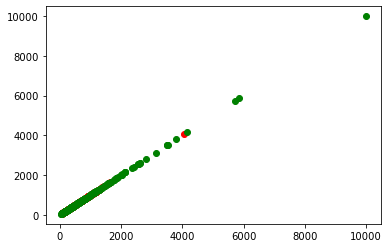

In [9]:
plt.scatter(df[tumaco]['Victconf_Desplazamiento forzado'],y=df[tumaco]['Victconf_Desplazamiento forzado'], label = 'tumaco', color = 'r')
plt.scatter(df[buenaventura]['Victconf_Desplazamiento forzado'],y=df[buenaventura]['Victconf_Desplazamiento forzado'], label = 'buenaventura', color = 'g')
plt.show()

## Dividimos los datos en entrenamiento y pruebas

In [10]:
train, test = train_test_split(df, test_size = 0.3, random_state = 42,stratify = df['Código DANE de Municipio'])

In [11]:
train['Código DANE de Municipio'].value_counts()/train['Código DANE de Municipio'].count()

52835    0.5
76109    0.5
Name: Código DANE de Municipio, dtype: float64

In [12]:
test['Código DANE de Municipio'].value_counts()/test['Código DANE de Municipio'].count()

76109    0.5
52835    0.5
Name: Código DANE de Municipio, dtype: float64

In [13]:
#Verificar la cantidad de valores nulos en dataframe entrenamiento
train.isna().sum()

Código DANE de Municipio                  0
Victconf_Desplazamiento forzado           0
Cant_acc_subversivas                      0
Cant_acc_terroristas                      0
Cant_atenta_pte_vias                      0
Cant_delito_med_ambiente                  0
Cant_delito_sexual                        0
Cant_extorsion                            0
Cant_homicidios                           0
Cant_homicid_colect                       0
Cant_lesiones_personales                  0
Cant_pirateria_terrestre                  0
Cant_secuestros                           0
Victconf_AbandoDespojForzTierras          0
Victconf_Actoterrorista                   0
Victconf_Amenaza                          0
Victconf_Confinamiento                    0
Victconf_Delitointegridadsexual           0
Victconf_Desaparición forzada             0
Victconf_Homicidio                        0
Victconf_LesionPersonalFisica             0
Victconf_LesionPersonalPsicolog           0
Victconf_MinasAntipers_explos   

In [14]:
#columnas unicas
train.columns.unique()

Index(['Código DANE de Municipio', 'Victconf_Desplazamiento forzado',
       'Cant_acc_subversivas', 'Cant_acc_terroristas', 'Cant_atenta_pte_vias',
       'Cant_delito_med_ambiente', 'Cant_delito_sexual', 'Cant_extorsion',
       'Cant_homicidios', 'Cant_homicid_colect', 'Cant_lesiones_personales',
       'Cant_pirateria_terrestre', 'Cant_secuestros',
       'Victconf_AbandoDespojForzTierras', 'Victconf_Actoterrorista',
       'Victconf_Amenaza', 'Victconf_Confinamiento',
       'Victconf_Delitointegridadsexual', 'Victconf_Desaparición forzada',
       'Victconf_Homicidio', 'Victconf_LesionPersonalFisica',
       'Victconf_LesionPersonalPsicolog', 'Victconf_MinasAntipers_explos',
       'Victconf_PerdidadeBienes', 'Victconf_Secuestro', 'Victconf_Tortura',
       'Victconf_Vinculacde Niños NiñasyAdoles'],
      dtype='object')

## Consulta de datos por Municipio
#### Código DANE : 52835-> Tumaco
#### 76109 -> Buenaventura 

In [15]:
#Cantidad de reuniones por Municipio
train.groupby(['Código DANE de Municipio']).size().reset_index(name='cantidad de registros')

,Código DANE de Municipio,cantidad de registros
0,52835,163
1,76109,163


# Selección de variables

In [16]:
#importancia de las variables a traves de arbol de decisión
model = DecisionTreeClassifier()

In [17]:
df.columns.unique()

Index(['Código DANE de Municipio', 'Victconf_Desplazamiento forzado',
       'Cant_acc_subversivas', 'Cant_acc_terroristas', 'Cant_atenta_pte_vias',
       'Cant_delito_med_ambiente', 'Cant_delito_sexual', 'Cant_extorsion',
       'Cant_homicidios', 'Cant_homicid_colect', 'Cant_lesiones_personales',
       'Cant_pirateria_terrestre', 'Cant_secuestros',
       'Victconf_AbandoDespojForzTierras', 'Victconf_Actoterrorista',
       'Victconf_Amenaza', 'Victconf_Confinamiento',
       'Victconf_Delitointegridadsexual', 'Victconf_Desaparición forzada',
       'Victconf_Homicidio', 'Victconf_LesionPersonalFisica',
       'Victconf_LesionPersonalPsicolog', 'Victconf_MinasAntipers_explos',
       'Victconf_PerdidadeBienes', 'Victconf_Secuestro', 'Victconf_Tortura',
       'Victconf_Vinculacde Niños NiñasyAdoles'],
      dtype='object')

In [17]:
#Se separa los datos en variables dependientes e independientes
X = df.drop('Código DANE de Municipio', axis=1)
y = df['Código DANE de Municipio']

In [18]:
model.fit(X, y)

DecisionTreeClassifier()

In [19]:
model.feature_importances_

array([0.07347477, 0.02204212, 0.03855305, 0.00780336, 0.00616644,
       0.00572246, 0.04471806, 0.08765492, 0.        , 0.39079854,
       0.00393419, 0.00572246, 0.        , 0.00731873, 0.26206888,
       0.        , 0.01528676, 0.00718113, 0.00363692, 0.00457797,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01333925])

In [20]:
#para ordenar
order_columns = X.columns[np.argsort(model.feature_importances_)[::-1]]

In [21]:
order_importance = np.sort(model.feature_importances_)[::-1]

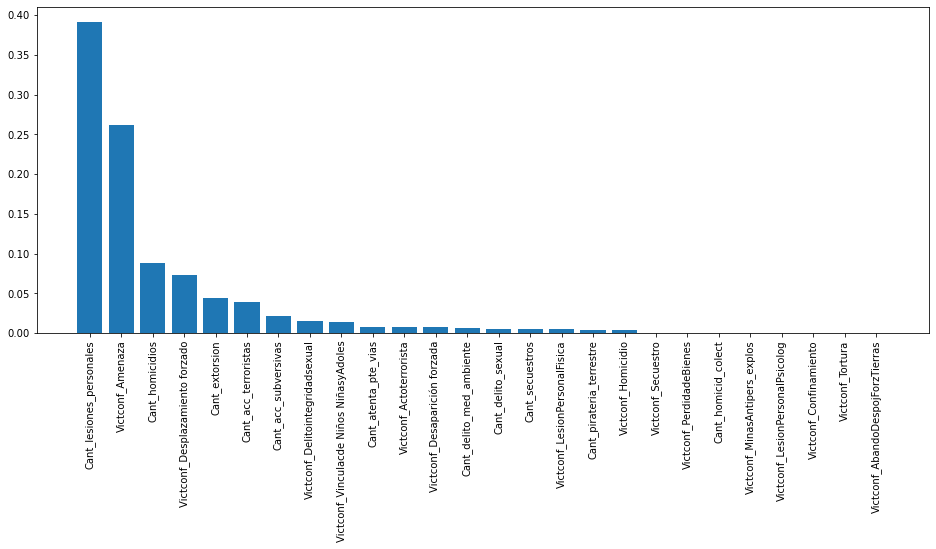

In [22]:
plt.figure(figsize=(16,6))
plt.bar(x = order_columns, height = order_importance)
plt.xticks(rotation = 90)
plt.show()

In [23]:
X.columns.unique()

Index(['Victconf_Desplazamiento forzado', 'Cant_acc_subversivas',
       'Cant_acc_terroristas', 'Cant_atenta_pte_vias',
       'Cant_delito_med_ambiente', 'Cant_delito_sexual', 'Cant_extorsion',
       'Cant_homicidios', 'Cant_homicid_colect', 'Cant_lesiones_personales',
       'Cant_pirateria_terrestre', 'Cant_secuestros',
       'Victconf_AbandoDespojForzTierras', 'Victconf_Actoterrorista',
       'Victconf_Amenaza', 'Victconf_Confinamiento',
       'Victconf_Delitointegridadsexual', 'Victconf_Desaparición forzada',
       'Victconf_Homicidio', 'Victconf_LesionPersonalFisica',
       'Victconf_LesionPersonalPsicolog', 'Victconf_MinasAntipers_explos',
       'Victconf_PerdidadeBienes', 'Victconf_Secuestro', 'Victconf_Tortura',
       'Victconf_Vinculacde Niños NiñasyAdoles'],
      dtype='object')

In [24]:
feactures = ['Cant_lesiones_personales','Victconf_Amenaza','Victconf_Desplazamiento forzado','Cant_homicidios']

In [25]:
#Modelo de clasificación
X_train = train[feactures]
y_train = train.iloc[:,0].ravel()

In [26]:
y_train = (y_train == 76109).astype('int')

In [27]:
#Modelo de clasificación
X_test = test[feactures]
y_test = test.iloc[:,0].ravel()

In [28]:
y_test = (y_test == 76109).astype('int')

In [29]:
X_train

,Cant_lesiones_personales,Victconf_Amenaza,Victconf_Desplazamiento forzado,Cant_homicidios
118,17,36,707,26
227,18,24,276,14
451,35,4,606,12
355,34,78,1188,13
154,8,37,419,6
...,...,...,...,...
79,4,5,1611,25
364,46,125,2423,24
310,29,0,184,8
247,24,0,101,14


In [30]:
y_train

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,

# Pipeline

In [31]:
numeric_pipeline = Pipeline(
    [
        ('Escaladominmax',MinMaxScaler())
        
    ]
)

In [32]:
column_transformer = ColumnTransformer(
    [
        ('numeric_pipeline', numeric_pipeline,[0,1,2,3])
        
    ])

# Pipeline con DecisionTreeClassifier

In [33]:
final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',DecisionTreeClassifier(max_depth=3) )
        
    ]
)

# Validación cruzada DecisionTreeClassifier

In [34]:
results = cross_validate(final_pipeline, X_train, y_train,
                        cv = 10, return_train_score =True,
                        scoring = ['accuracy','f1'])

In [35]:
print("train: ",results["train_accuracy"].mean(), "+-",results["train_accuracy"].std())
print("val: ",results["test_accuracy"].mean(), "+-",results["test_accuracy"].std())

train:  0.8848029996981728 +- 0.012787962747707098
val:  0.8465909090909092 +- 0.039300953777999095


# Pipeline con RandomForestClassifier

In [36]:
final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',RandomForestClassifier(max_depth=3) )
        
    ]
)

In [37]:
results = cross_validate(final_pipeline, X_train, y_train,
                        cv = 10, return_train_score =True,
                        scoring = ['accuracy','f1'])

In [38]:
print("train: ",results["train_accuracy"].mean(), "+-",results["train_accuracy"].std())
print("val: ",results["test_accuracy"].mean(), "+-",results["test_accuracy"].std())

train:  0.9110422325926957 +- 0.006190042664236
val:  0.8865530303030305 +- 0.051633387042532175


# Ajuste de hiperparametros

In [39]:
#randomforest

final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',RandomForestClassifier(max_depth=3) )
        
    ]
)

In [40]:
results = cross_validate(final_pipeline, X_train, y_train,
                        cv = 10, return_train_score =True,
                        scoring = ['accuracy','f1'])

In [41]:
#probar con 50, 100 y 200 arboles y altura = 2,3,5,10
grid={'n_estimators': [ 50,100,200],'max_depth':[2,3,5,10] }

In [42]:
X_transformed = column_transformer.fit_transform(X_train)

In [43]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = grid, cv=10, scoring= 'accuracy')

In [44]:
grid_search.fit(X_transformed, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [47]:
grid_search.best_score_

0.8987689393939394

In [48]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 200}

# Entrenamiento final

In [49]:
final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',RandomForestClassifier(max_depth=5,n_estimators = 50) )
        
    ]
)

In [50]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Pipeline de preprocesamiento',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('Escaladominmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3])])),
                ('Modelo de predicción(árbol)',
                 RandomForestClassifier(max_depth=5, n_estimators=50))])

In [51]:
joblib.dump(final_pipeline, 'modelrf.joblib')

['modelrf.joblib']

In [52]:
!tar -zcvf modelrf.tar.gz modelrf.joblib

modelrf.joblib
